# Burgers Equation

In this notebook I will solve the Burgers equation $u_t + u \cdot u_x=0$ using as an initial condition the profile $u(x,t=0)= 10 \exp{[-(x-x_0)^2]}$ with $x_0=5$. I chose the domain in a way that $x\in [0,10]$ with periodic boundary conditions. There will be two ways I will adrees the problem with: by solving the non conservative equation, or the conservative equation. The results I expect are both convergent, but in the non conservative form to the wrong solution.

## Conservative form: 

In this section I will solve the conservative form of the Burgers equation, seeing that it converges to the right solution.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

In [8]:
# Define the domain
L_cons = 10.0     # Domain length
nx_cons = 101    # Number of grid points
dx_cons = L_cons/(nx_cons-1)   # Grid spacing
x_cons = np.linspace(0, L_cons, nx_cons)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf_cons = 0.5

t_final_cons = 0.5

# Define the initial condition
x0_cons=5
u_initial_cons = 10 * np.exp(-(x_cons-x0_cons)**2)

# Initialize the solution array
u_current_cons = u_initial_cons.copy()

dt_cons = np.min(cf_cons*dx_cons/u_initial_cons) 

#we create arrays where we will store the time and the l2norm
l2norm_cons=[]
l2norm_cons.append(np.sqrt(np.sum(u_current_cons**2)/len(u_current_cons)))

time_cons=[]
time_cons.append(0.0)

print('nx=',nx_cons)
print('dx=',dx_cons)
print('dt=',dt_cons)
print('Number of iterations=',t_final_cons/dt_cons)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


In [9]:
# Initialize time and iteration counter
t_cons = 0.0
i_cons = 0

plt.plot(x_cons, u_current_cons, c='grey')
plt.title('Time='+str(round(t_cons,2)))
plt.savefig('initial_u_burg.png')

# add the array for the overall evolutions of the solutions over time: 

total_sol_cons = []

#solve the advection equation
while t_cons < t_final_cons:
    
    total_sol_cons.append(u_current_cons)
    
    u_next_cons = u_current_cons - dt_cons / dx_cons * (1 / 2 * u_current_cons**2 - 1 / 2 * np.roll(u_current_cons, 1)**2)    
    
    # Update the solution
    u_current_cons = u_next_cons.copy()
    
    
    #advance the time 
    t_cons += dt_cons
    i_cons += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_cons.append(np.sqrt(np.sum(u_current_cons**2)/len(u_current_cons)))
    time_cons.append(t_cons)
    
    if (i_cons%10==0):
        plt.plot(x_cons, u_current_cons, c='grey')
        plt.title('Time='+str(round(t_cons,2)), fontsize=13)
        plt.ylim(0,10.1)
        plt.xlabel("x [IU]")
        plt.ylabel("$\mathrm{u}(x, t)$")
        plt.savefig('./images/Burgers/C/fig_'+str(i_cons).zfill(5)+'.png', dpi=200)
        plt.close()

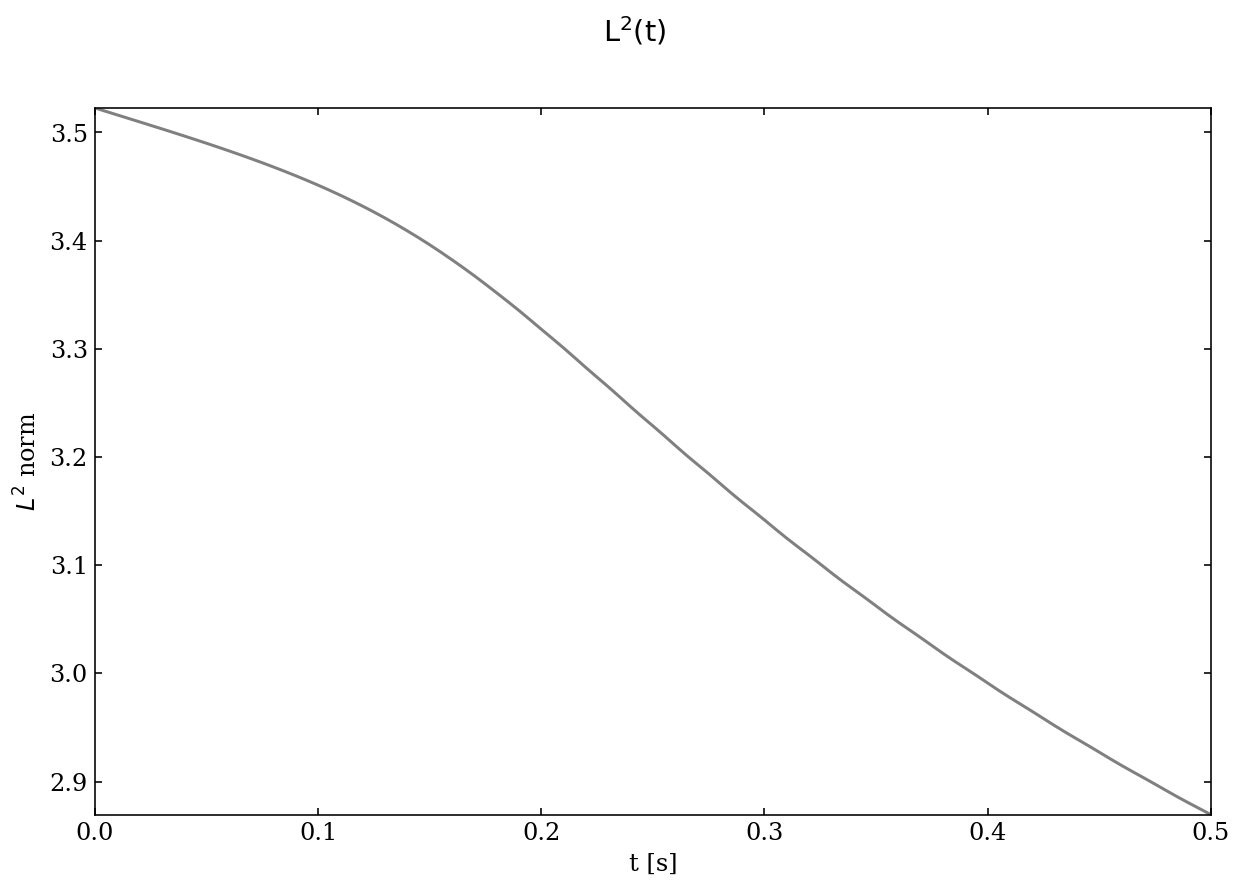

In [4]:
plt.figure(figsize = (10, 6.5))
plt.plot(time_cons,l2norm_cons, c='grey')
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.savefig('norm_b_cc.png')
plt.show()

In [5]:
import matplotlib.animation as animation
import matplotlib
matplotlib.use("TkAgg")

<IPython.core.display.Javascript object>


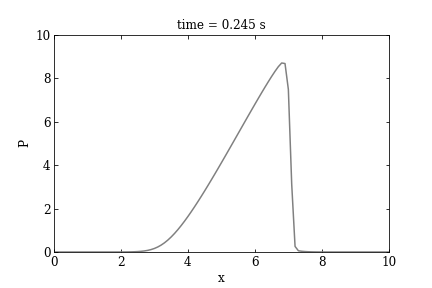

In [6]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x_cons, np.zeros(len(x_cons))*np.NaN, '-', c='grey')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,10.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol_cons)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"time = {t/98 * 0.5:.3f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol_cons), 2), blit=True)
ani.save('flux_cons_form.gif')
plt.show()